In [ ]:
cd D:\Sabudh\Anomaly

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Normalise data

In [4]:
# min max scaling except on time and class columns
X=data.drop(["Time","Class"],axis=1)
X= (X- X.min()) / (X.max() - X.min())

In [5]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


# kde plots of features 

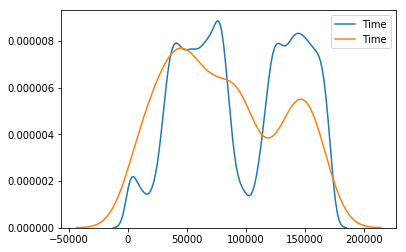

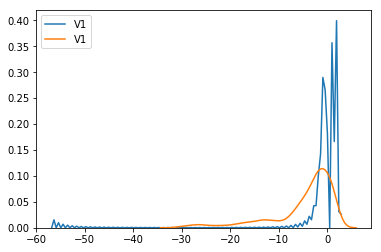

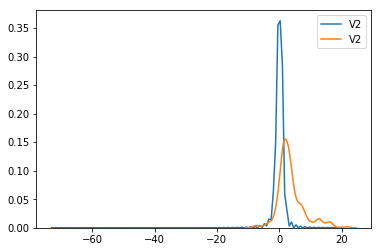

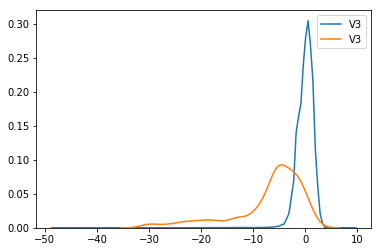

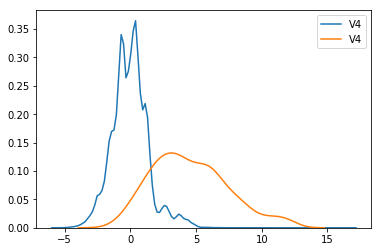

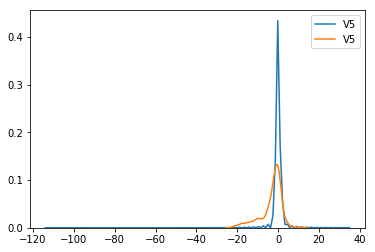

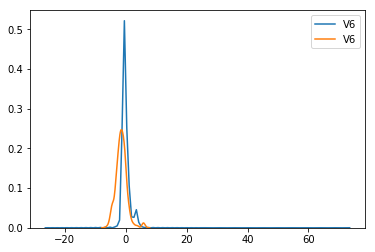

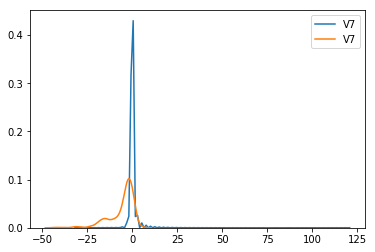

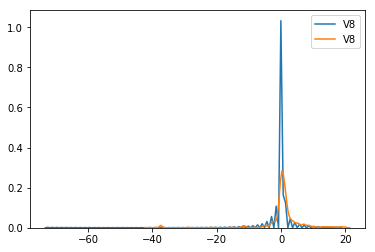

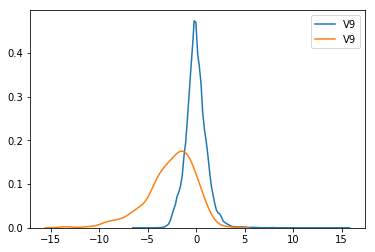

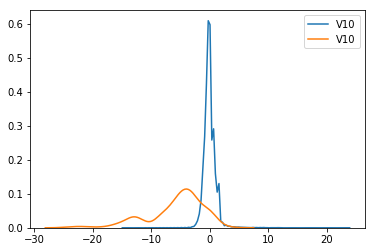

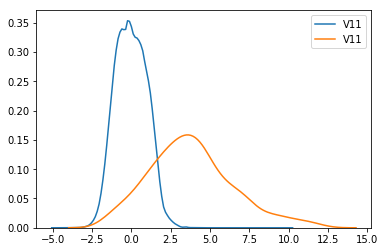

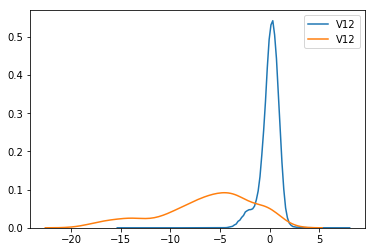

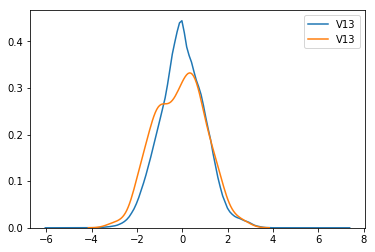

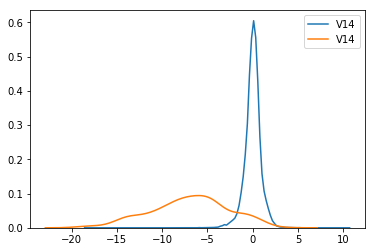

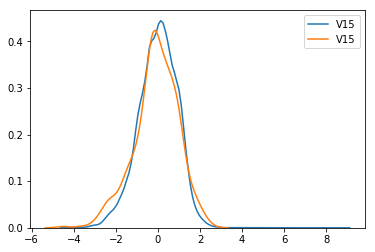

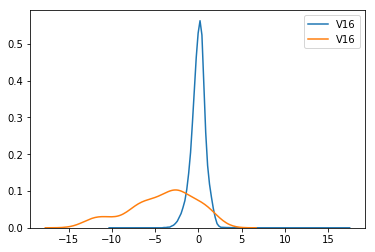

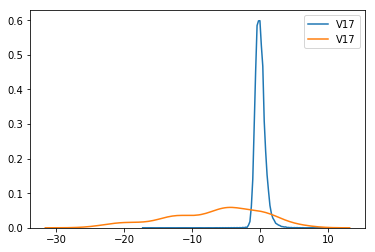

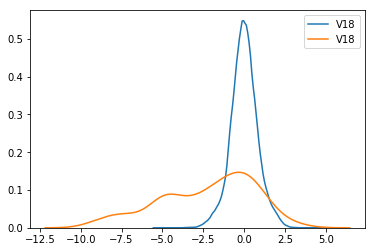

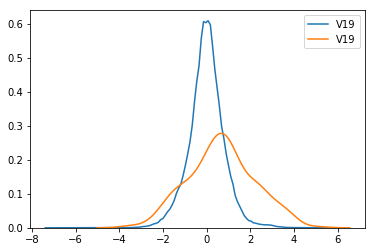

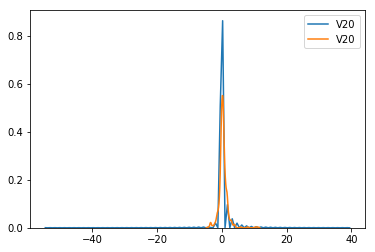

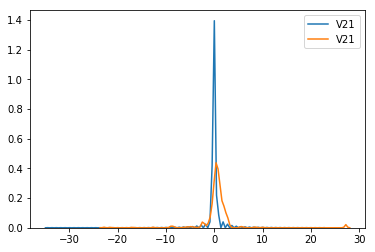

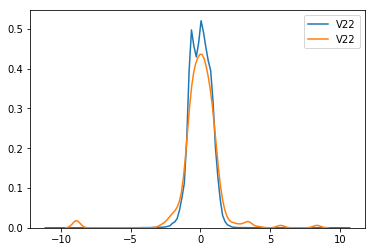

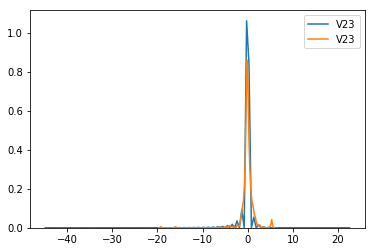

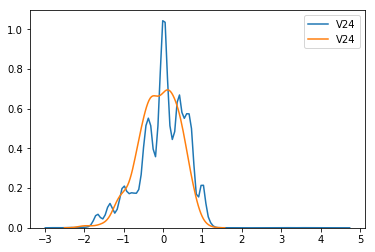

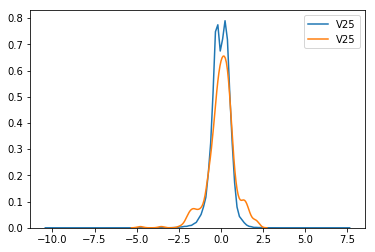

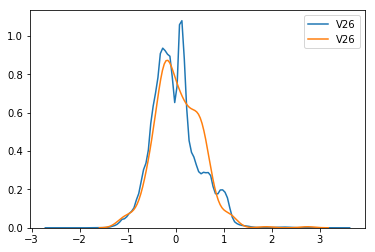

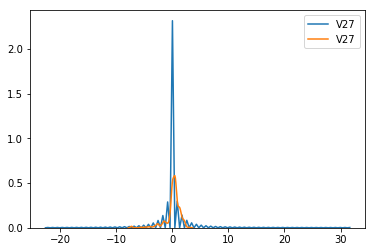

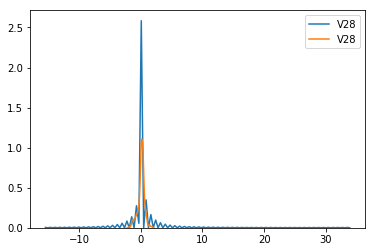

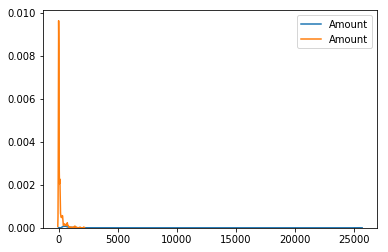

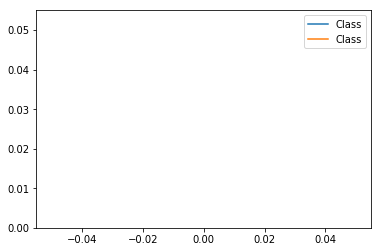

In [6]:
for j in list(data):
    for i in range(2):
        sns.kdeplot(data[data.Class==i][j])
    plt.show()

# Features to be kept

In [7]:
# using only some of the features that look distinct for anomaly and normal class. 
keep=['V1','V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19']
X=X[keep]

# LOF algorithm (unsupervised )

# Isolation Forest

# Multivariate Gaussian Distribution model

# Data division

In [8]:
X['Class']=data['Class']

In [49]:
anomalies=X[X['Class']==1]
normal=X[X['Class']==0]

In [50]:
# data_train, data_cv, data_test

data_train=normal.iloc[:int(len(normal)*0.6)]
data_cv=normal.iloc[int(len(normal)*0.6):int(len(normal)*0.8)]
data_test=normal.iloc[int(len(normal)*0.8):]

data_cv=data_cv.append(anomalies.iloc[:int(len(anomalies)*0.5)])
data_test=data_test.append(anomalies.iloc[int(len(anomalies)*0.5):])

x_train=data_train.drop(labels='Class',axis=1)
y_train=data_train['Class']
x_cv=data_cv.drop(labels='Class',axis=1)
y_cv=data_cv['Class']
x_test=data_test.drop(labels='Class',axis=1)
y_test=data_test['Class']

# functions

In [59]:
from scipy.stats import multivariate_normal
# function to calculate parameters, mu and sigma 
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

# function to calculate probability density
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

# model

In [105]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix

In [60]:
# mu,sigma of normal transactions to be used
mu,sigma=estimateGaussian(x_train)

p_train=multivariateGaussian(x_train,mu,sigma)
p_cv=multivariateGaussian(x_cv,mu,sigma)
p_test=multivariateGaussian(x_test,mu,sigma)

# finding the optimum epsilon value (on cv set)

In [205]:
test_cases=np.sort(np.unique(p_train))[:1000]
#epsilon=1.0527717316e-70 
d={}
d2={}
for epsilon in test_cases:
    y_pred_cv=p_cv<epsilon
    d[epsilon]=f1_score(y_cv,y_pred_cv.astype(int))
epsilon=max(d.items(),key=lambda x: x[1])[0]

#refining epsilon value
for i in range(100):
    epsilon=epsilon*0.9
    y_pred_cv=p_cv<epsilon
    d2[epsilon]=f1_score(y_cv,y_pred_cv.astype(int))
epsilon=max(d2.items(),key=lambda x: x[1])[0]
print(f"Optimum epsilon value : {epsilon}")

Optimum epsilon value : 8.475796038420466e-67


In [207]:
print("f1 score,recall,precision on test set :")
f1_score(y_cv,y_pred_cv.astype(int)),recall_score(y_cv,y_pred_cv.astype(int)),precision_score(y_cv,y_pred_cv.astype(int))

f1 score,recall,precision on test set :


(0.7488986784140969, 0.6910569105691057, 0.8173076923076923)

In [208]:
confusion_matrix(y_cv,y_pred_cv.astype(int))

array([[56825,    38],
       [   76,   170]], dtype=int64)

# predicting on test set

In [209]:
y_pred_test=p_test<epsilon
print("f1 score,recall,precision on test set :")
f1_score(y_test,y_pred_test.astype(int)),recall_score(y_test,y_pred_test.astype(int)),precision_score(y_test,y_pred_test.astype(int))

f1 score,recall,precision on test set :


(0.7336448598130841, 0.6382113821138211, 0.8626373626373627)

In [210]:
confusion_matrix(y_test,y_pred_test.astype(int))

array([[56838,    25],
       [   89,   157]], dtype=int64)